# <b><u> Project Title : Fraud Detection </u></b>

## <b> Problem Description </b>

### This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.
### Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.


## <b> Data Description </b>

### step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

### type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

### amount - amount of the transaction in local currency.

### nameOrig - customer who started the transaction

### oldbalanceOrg - initial balance before the transaction

### newbalanceOrig - new balance after the transaction

### nameDest - customer who is the recipient of the transaction

### oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

### newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

### isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

### isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warning for ignore warnings 
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [51]:
#Importing The Data
data = pd.read_csv('Fraud.csv')

In [52]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [54]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## <b> Data Cleaning </b>


Handle missing values: Impute missing values using techniques such as mean, median, or mode imputation, or use advanced techniques like KNN imputatioPCA.

Outlier detection: Employ methods like z-score, IQR, or clustering-based techniques to identify outliers and decide whether to remove them or treat them separately.


Multicollinearity: Utilize techniques such as correlation analysis or variance inflation factor (VIF) to identify and mitigate multicollinearity by removing redundant variables or using dimensionality reduction techniques like PCA.

In [55]:
# Checking for Missing/Null values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [56]:
# Checking for duplicates
data.duplicated().sum()

0

### It is always good to remove Outliers from a model for model evaluation.
### Since it is a data based on transactions we are ignoring Outliers as removing them can lead to loss of sensitive data.

## <b> Analysing the Data </b>

In [57]:
#Checking the different types of payments and their counts
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

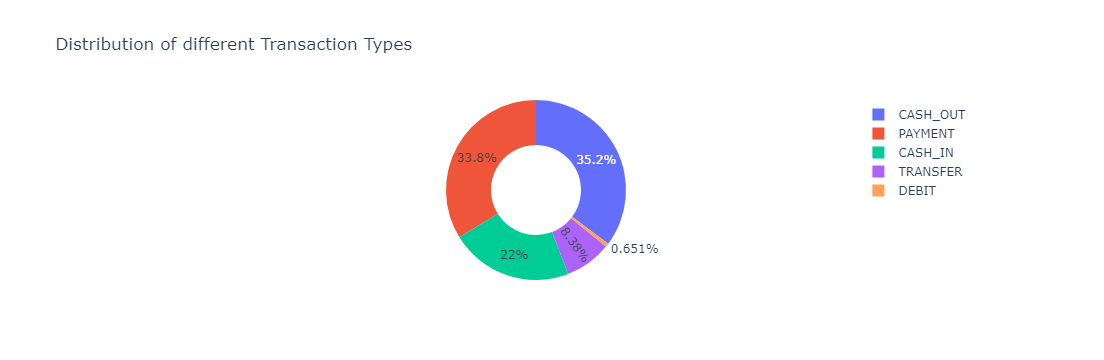

In [58]:
#Creating a pie chart for different composition of Payment types
type = data['type'].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values = quantity, names = transactions, hole = 0.5, title = 'Distribution of different Transaction Types')
figure.show()

### Checking Multi-collinearity using Correlation Mtrix.

In [59]:
numeric_data = data.select_dtypes(include='number')
correlation = numeric_data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [60]:
# Feature Engineering
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


## <b> Feature Selection </b>

In [61]:
x = pd.DataFrame(data, columns=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'])
y = data["isFraud"]

In [62]:
# splitting the data into Calibaration and Validation datasets
from sklearn.model_selection import train_test_split
x_calib, x_valid, y_calib, y_valid = train_test_split(x, y, test_size=0.30, random_state=42)

## <b> Fraud Detection Model: </b>
I would employ a supervised learning approach, considering algorithms like logistic regression, decision trees, random forests, or gradient boosting machines (any one).

The model should be trained on Calibration data and will be tasted on Validation data.

Feature engineering could involve creating new variables or transforming existing ones to enhance model performance.

Lastly in our model we will use GridSearchCV technique to fine-tune the parameters.

## <b> Decision Tree </b>

In [63]:
# Define the model
model = DecisionTreeClassifier()

### Using GridSearchCV to Fine-Tune the Parameters

In [64]:
param_grid = {
    'criterion': ['entropy'],# 'gini'],
    'max_depth': [None],# 5, 10, 15],
    'min_samples_split': [2],# 5, 10],
    'min_samples_leaf': [1],# 2, 4]
}
#After finding out the best parameters we commented out the rest for faster processing speed.

In [65]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_calib, y_calib)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [2]},
             scoring='accuracy', verbose=1)

In [66]:
best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_

In [67]:
print("The Best Parameters are: ")
print(best_parameters)

The Best Parameters are: 
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [68]:
# Checking the Accuracy Score
accuracy = best_model.score(x_valid, y_valid)
print("Accuracy:", accuracy)

Accuracy: 0.9996788534702161


### Predicting the Model

In [69]:
features = np.array([[2, 21249.0, 19384.72, 0.0]])  # Example feature vector user can change it according to the provided data
print("Predicted label:", best_model.predict(features))

Predicted label: ['No Fraud']


## <b> Key Predictive Factors: </b>
Key factors predicting fraudulent behavior may include transaction amount, transaction frequency, geographic location, device information, time of transaction, and behavioral patterns.

Additionally, variables derived from anomaly detection techniques or clustering algorithms might also be crucial in identifying fraudulent patterns.


## <b> Interpretation of Factors: </b>
Yes, these factors make sense as they align with common fraud detection strategies. For example, abnormal transaction amounts or frequencies may indicate potential fraud, and geographic inconsistencies or unusual device information can raise suspicion.

Factors like time of transaction and behavioral patterns can also be indicative of fraudulent activity, as fraudsters often exhibit distinct patterns different from legitimate customers.

## <b> Preventive Measures: </b>

Implement real-time monitoring systems capable of detecting anomalies and flagging suspicious transactions for manual revierns.

Enhance authentication methods such as two-factor authentication (2FA) or biometric verification to strengthen security.

Regularly update fraud detection algorithms to adapt to evolving fraud tactics and patterns.

## <b> Checking the Effectiveness of the Preventive Measures: </b>
Measure the reduction in the number of fraudulent transactions and false positives post-implementation of preventive measures.s.

Monitor key performance metrics such as fraud detection rate, false positive rate, and overall customer satisfaction.

Conduct periodic reviews and audits to ensure the effectiveness and efficiency of the fraud prevention measures.